## Cau 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("D:/DS102/Thực hành/lab_1/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.shape

(517, 13)

In [4]:
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

### Preprocessing

In [5]:
for col_name in df.columns:
    print("Total NaN: ", df[col_name].isna().sum())
    print("Total null: ", df[col_name].isnull().sum())
    print("Data type: ", df[col_name].dtype)
    print("+"*10)

Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
Total NaN:  0
Total null:  0
Data type:  object
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  int64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++
Total NaN:  0
Total null:  0
Data type:  float64
++++++++++


In [6]:
def convert_day(day:  str)->int:
    day_dict = {
        "mon": 2,
        "tue": 3,
        "wed": 4,
        "thu": 5,
        "fri": 6,
        "sat": 7,
        "sun": 8,
    }
    return day_dict[day]

In [7]:
def convert_month(month: str)-> int:
    month_dict = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12,
    }
    return month_dict[month]

In [8]:
df["day"] = df["day"].apply(convert_day)

In [9]:
df["month"] = df["month"].apply(convert_month)

### Model

In [10]:
class LinearRegression:
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        delta = y - y_hat
        return np.square(delta).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        cov = np.matmul(X.T, X)
        inv_cov = np.linalg.inv(cov)
        self.theta_ = inv_cov @ (X.T @ y)  # Chỉ tính inv_cov bên trong, không cần tham số inv_cov

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        return y_pred


In [11]:
X_y = df.to_numpy()

In [12]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections= [int(0.8*N)])

In [13]:
X_y_train

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 6.  ,  3.  ,  2.  , ...,  2.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  ,  2.  , ...,  9.4 ,  0.  ,  4.62],
       [ 9.  ,  4.  ,  7.  , ...,  4.5 ,  0.  ,  1.63]])

In [14]:
X_y_test

array([[  7.  ,   5.  ,   8.  , ...,   3.6 ,   0.  ,   0.  ],
       [  5.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  8.  ,   6.  ,   8.  , ...,   4.9 ,   0.  , 746.28],
       ...,
       [  7.  ,   4.  ,   8.  , ...,   6.7 ,   0.  ,  11.16],
       [  1.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  6.  ,   3.  ,  11.  , ...,   4.5 ,   0.  ,   0.  ]])

In [15]:
X_train = X_y_train[:,:12]
y_train = X_y_train[:,12:]

X_test = X_y_test[:,:12]
y_test = X_y_test[:,12:]

In [17]:
lr = LinearRegression()
lr.fit( X_test, y_test)

In [18]:
y_pred = lr.predict(X_test)
y_pred


array([[ 39.71150797,  17.91173152,  61.72161262,  35.14806144,
         28.00565165,  18.06532348,  11.83503797,  67.74211845,
         35.23061302,  54.78001622, -20.86803335,  48.39745062,
         -9.4459973 ,  28.58021692,  24.47521286,  23.35810626,
         12.28876787,  32.01920151,  -0.33199254,  63.83470465,
         -0.42069362,   4.40527221,  -6.19534486,  48.38054968,
          6.92618948,   8.65470254, -36.69768134,   8.47606403,
         49.83003491,  12.66055136,  -4.6599389 ,  -3.32203781,
         10.403083  ,  -1.86793262,  13.20957155,   9.14589581,
         21.89323496,  30.47265163, -27.09052319,  32.90857374,
          8.56702617,  -2.19552212,  -4.33053245, -10.74478936,
          3.93482961,  32.61729823,  37.58161542,   1.80608928,
         32.61729823,   3.12119369,  18.06882733,  11.40673594,
        -58.8108667 ,  28.0841414 ,   2.89579029,   9.526617  ,
         35.60776966,  18.3560015 ,  10.42335252,  32.59623001,
         34.72697241,  19.52612841,  47.

In [19]:
lr.rmse(y_test, y_pred)

82.78225796136772

In [20]:
df.to_csv('data_preprocessing.csv', index = False)

### Visualization

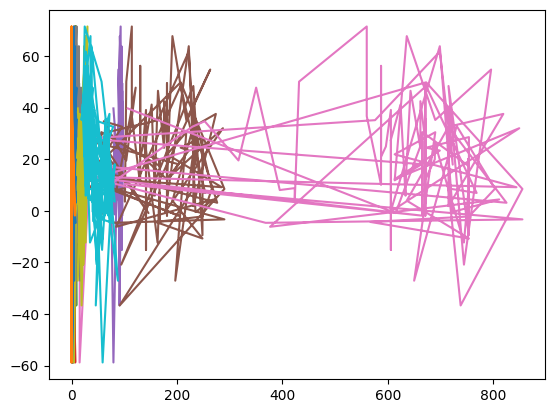

In [21]:
plt.plot(X_test, y_pred.T)